<a href="https://colab.research.google.com/github/Bhuto1998/Data-Science-Year-2020/blob/master/Pattern_Recognition_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pattern Recognition Assignment-2
## Name: Arnab Mukherjee
## Roll: MB1908

In [1]:
#Importing libraries
import numpy as np
import pandas as pd


### Generating Dataset C
1. We use the leaf dataset from UCI repository
2. The data consists of 340 samples from 36 classes

In [3]:
df = pd.read_csv("leaf.csv",header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [4]:
#Getting unique label values:
df[0].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])

In [5]:
#Splitting the dataset into test and train: 75/25
np.random.seed(1908)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df[0].values, test_size=0.25)

### Unpruned CART:
We will use ginni's index as a measure of impurity(this is the default index in sklearn)

In [8]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [12]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)  #train parameters: features and target
pred = dtree.predict(X_test)  #parameter: new data to predict

In [13]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.5058823529411764

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


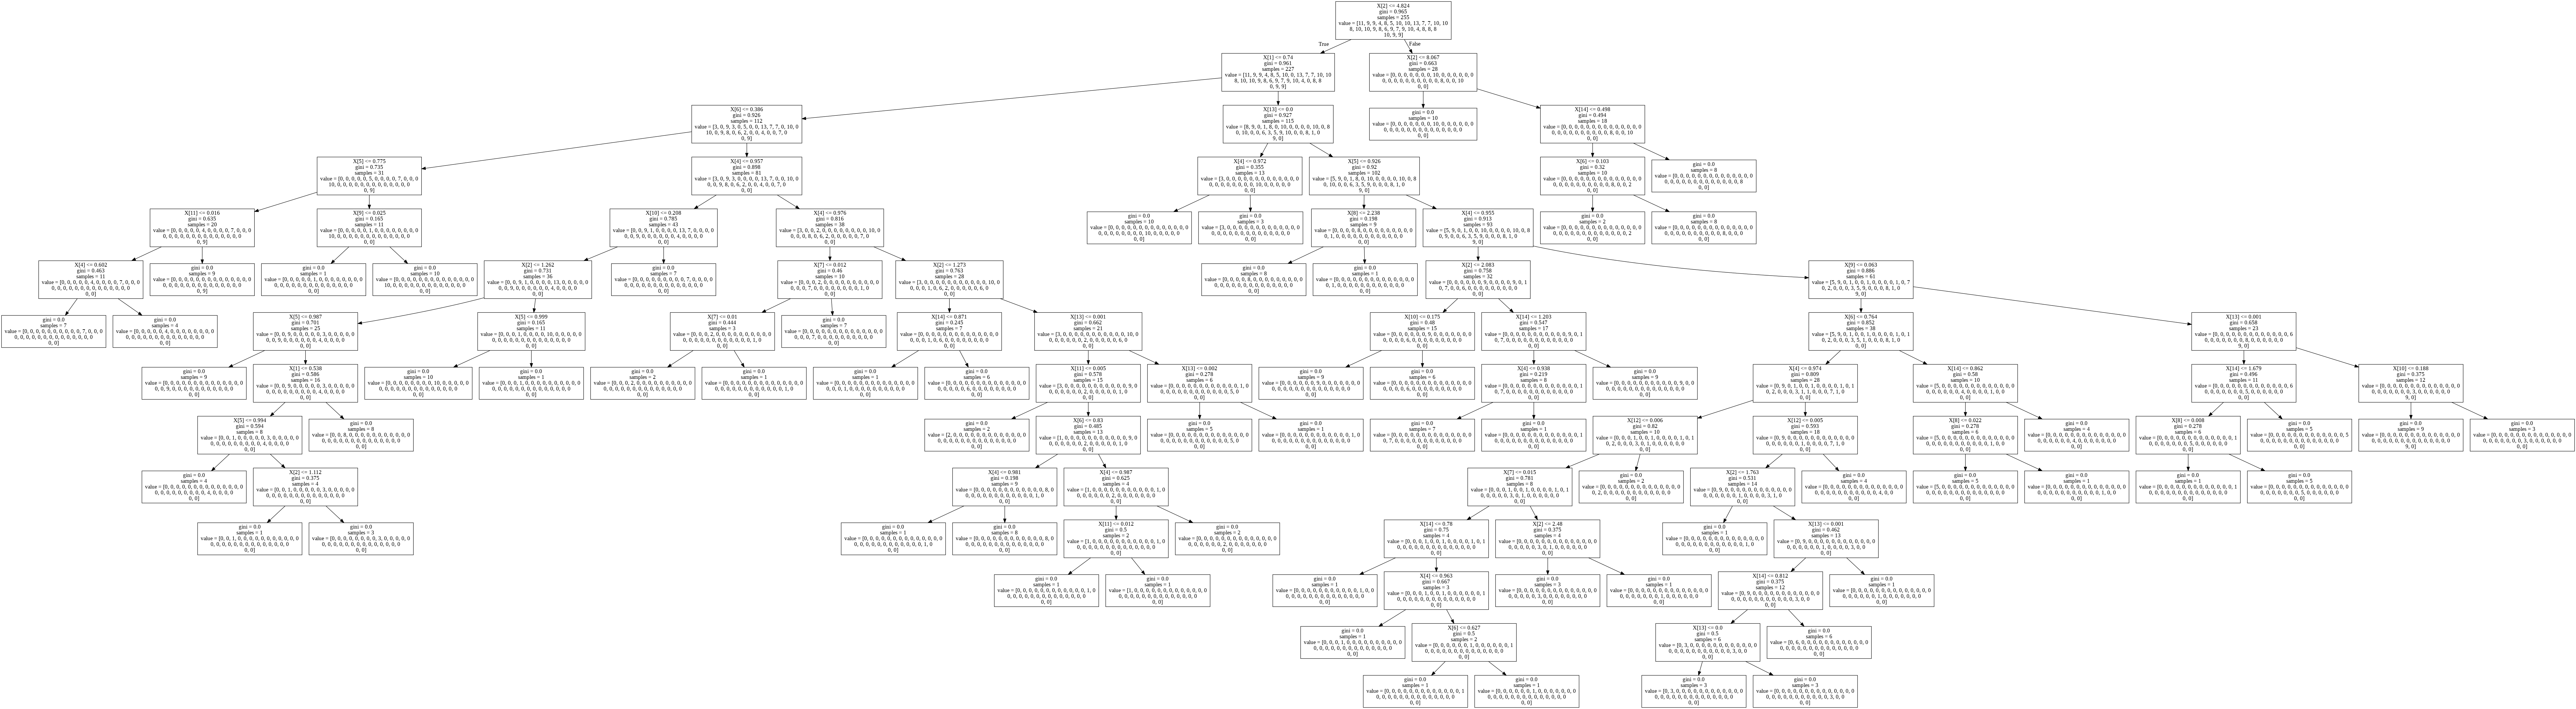

In [14]:
#Visualizing the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

### CART based on cost complexity prunning
Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [18]:
clf = DecisionTreeClassifier(criterion = 'gini',random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

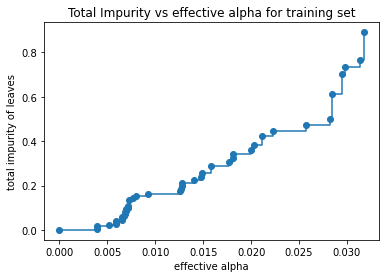

In [19]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [20]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03735583456266961


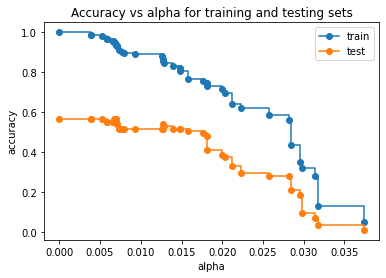

In [21]:
#Accuracy
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [25]:
print(max(test_scores)) #maximum test accuracy
print(np.argmax(test_scores))

0.5647058823529412
0


As we can see for low values of $\alpha$ the tree overfits and for high values of $\alpha$ the tree underfits.  As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, interestingly setting ccp_alpha=0.0 maximizes the testing accuracy.

### Random Forest with 3 predictors per node

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
#number of trees in the forest = 10000
clf = RandomForestClassifier(n_estimators=10000,criterion = 'gini',max_features=3, random_state=0)

In [47]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.7294117647058823

### Bagging with 100 bootstrap Replication

In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [51]:
clf = BaggingClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

In [52]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.6823529411764706

### Boosting with n = 1,...,500 trees

In [55]:
from sklearn.ensemble import AdaBoostClassifier
test_acc = []
train_acc = []
for n in range(500):
  clf = AdaBoostClassifier(n_estimators=(n+1)).fit(X_train, y_train)
  y_pred = clf.fit(X_train, y_train).predict(X_test)
  temp = accuracy_score(y_test, y_pred)
  test_acc = test_acc+ [temp]
  y_pred = clf.fit(X_train, y_train).predict(X_train)
  temp = accuracy_score(y_train, y_pred)
  train_acc = train_acc + [temp]


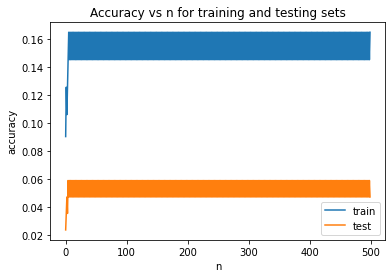

In [63]:
n = range(500)
fig, ax = plt.subplots()
ax.set_xlabel("n")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs n for training and testing sets")
ax.plot(n, train_acc, label="train")
ax.plot(n, test_acc, label="test")
ax.legend()
plt.show()

### MultiLayer Perceptron with single hidden layer having 3 and 5 hidden nodes respectively:

In [61]:
from sklearn.neural_network import MLPClassifier
#Case-1: Hidden Layer size = 3
clf = MLPClassifier(solver='adam', alpha=1e-7,hidden_layer_sizes=(3,),max_iter=2000000, random_state=1)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Case-1: " + str(accuracy_score(y_test, y_pred)))

#Case-2: Hidden Layer size = 5
clf = MLPClassifier(solver='adam', alpha=1e-7,hidden_layer_sizes=(5,), max_iter=2000000,random_state=1)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Case-2: " + str(accuracy_score(y_test, y_pred)))


Case-1: 0.27058823529411763
Case-2: 0.4588235294117647
